# import

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

In [32]:
# 노트북에 plot 그리기
%matplotlib inline    
# plot의 글씨 선명하게
%config InlineBackend.figure_format = 'retina'  

plt. style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

In [33]:
# 출력 컬럼 40개
pd.set_option('display.max_columns', 40)

# 모듈

In [34]:
# , 제거
def delcom(x):
    result = x.replace(',','')
    return result

# data

In [35]:
product=pd.read_csv('01_Pruduct.csv')
print(product.shape)
product.info()

C:\Users\meuch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5024906, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
CLNT_ID      int64
SESS_ID      int64
HITS_SEQ     int64
PD_C         int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


In [36]:
search1=pd.read_csv('02_Search1.csv')
print(search1.shape)
search1.info()

(2884943, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
CLNT_ID       int64
SESS_ID       int64
KWD_NM        object
SEARCH_CNT    int64
dtypes: int64(3), object(1)
memory usage: 88.0+ MB


In [37]:
search2=pd.read_csv('03_Search2.csv',parse_dates=["SESS_DT"])
print(search2.shape)
search2.info()

(8051172, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051172 entries, 0 to 8051171
Data columns (total 3 columns):
SESS_DT       datetime64[ns]
KWD_NM        object
SEARCH_CNT    object
dtypes: datetime64[ns](1), object(2)
memory usage: 184.3+ MB


In [38]:
custom=pd.read_csv('04_Custom.csv')
print(custom.shape)
custom.info()

(671679, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671679 entries, 0 to 671678
Data columns (total 3 columns):
CLNT_ID        671679 non-null int64
CLNT_GENDER    671679 non-null object
CLNT_AGE       671679 non-null int64
dtypes: int64(2), object(1)
memory usage: 15.4+ MB


In [39]:
session=pd.read_csv('05_Session.csv',parse_dates=['SESS_DT'])
print(session.shape)
session.info()

(2712907, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
CLNT_ID            int64
SESS_ID            int64
SESS_SEQ           int64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 186.3+ MB


In [40]:
master=pd.read_csv('06_Master.csv')
print(master.shape)
master.info()

(847652, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847652 entries, 0 to 847651
Data columns (total 5 columns):
PD_C        847652 non-null int64
PD_NM       847652 non-null object
CLAC1_NM    847652 non-null object
CLAC2_NM    847652 non-null object
CLAC3_NM    847652 non-null object
dtypes: int64(1), object(4)
memory usage: 32.3+ MB


# 결측치

In [41]:
product.isnull().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

In [42]:
search1.isnull().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [43]:
search2.isnull().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [44]:
custom.isnull().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [45]:
session.isnull().sum()  #결측치 발견

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

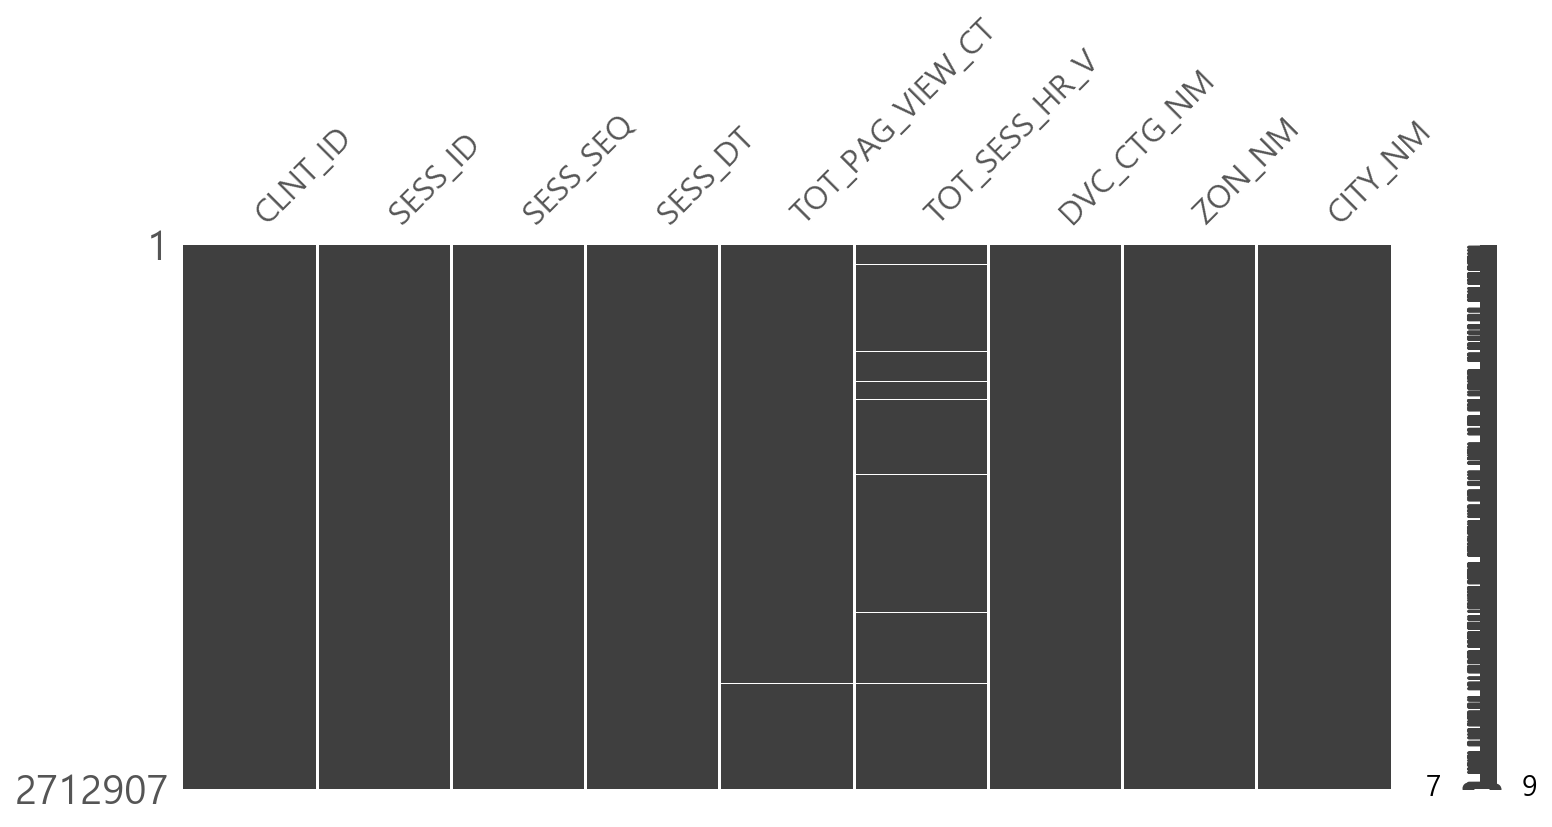

In [46]:
import missingno as msno
# conda install -c conda-forge/label/cf201901 missingno
msno.matrix(session, figsize=(12,5))

In [47]:
master.isnull().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

# 날짜 데이터 년월일 칼럼 추가
 - search2
 - session

In [48]:
search2['year']=search2['SESS_DT'].dt.year
search2['month']=search2['SESS_DT'].dt.month
search2['day']=search2['SESS_DT'].dt.day

In [49]:
session['year']=session['SESS_DT'].dt.year
session['month']=session['SESS_DT'].dt.month
session['day']=session['SESS_DT'].dt.day

# Ⅰ. product 

## product 칼럼 전처리

In [50]:
product.head(10)
# PD_BUY_AM 콤마 지우기 PD_BUY_AM, PD_BUY_CT DTYPE INT로 변경
# 총 판매량 추가
# PD_BRA_NM에 [] 가 있는 자료가 있고 없는 자료가 있음 [] 제거
# PD_ADD_NM 에 색상, 사이즈, 갯수가 모두 포함되어있음.
# PD_C의 큰 분류인 master 데이터의 CLAC1_NM을 추가



,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5
5,4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,"39,000",1
6,4147739,6881895,10,568751,신발색상:블랙(BK)/신발사이즈:280,[디스커버리],"39,000",1
7,4148106,6537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,"39,000",1
8,4148129,3942102,2,755148,모델명:올나이터 / 1개,어반디케이,"39,000",1
9,4148527,5718021,19,608620,사이즈:7 / 1개,나이키,"39,000",1


### Ⅰ- 1. PD_BUY_AM 콤마 지우기 PD_BUY_AM, PD_BUY_CT DTYPE INT로 변경

In [51]:
# CT가 형태가 혼합이 되어있다. STR로 변환 후 컴마 제거 후 INT로 변경
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('str')

In [52]:
product['PD_BUY_AM']=product['PD_BUY_AM'].apply(delcom)
product['PD_BUY_CT']=product['PD_BUY_CT'].apply(delcom)

In [53]:
product['PD_BUY_AM']=product['PD_BUY_AM'].astype('int')
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('int')


### Ⅰ- 2. 총 판매량 추가

In [54]:
product['PD_BUY_TOTAL']=product['PD_BUY_AM']*product['PD_BUY_CT']

### Ⅰ- 3. PD_BRA_NM에 [ ]제거 

In [55]:
## 값이 각각 있다는 것을 알 수 있음  -> ex)'아베다'로 통일
print('아베다 = ',sum(product['PD_BRA_NM']=='아베다'))

print('[아베다] = ',sum(product['PD_BRA_NM']=='[아베다]'))


아베다 =  5719
[아베다] =  1285


In [56]:
product['PD_BRA_NM']=product['PD_BRA_NM'].apply(lambda x : x.translate({ord('['):'',
                                                   ord(']'):''}))
print(sum(product['PD_BRA_NM']=='아베다'))

7004


In [57]:
product

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,39000
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000
2,4142395,6158159,85,179538,(not set),아베다,39000,1,39000
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000
4,4144917,6406509,78,190306,5개,데코르테,39000,5,195000
...,...,...,...,...,...,...,...,...,...
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),39000,1,39000
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,39000,1,39000
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,39000,1,39000
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,39000,1,39000


### Ⅰ- 5. product+master 데이터 병합

In [58]:
product_master=pd.merge(product, master, on='PD_C')

In [59]:
product_master['CLAC1_NM'].unique()  # 가전 ,의류, 식품 다양한 분야이므로 전체 데이털르 한번에 처리하는 것은 의미가 없다고 생각


array(['화장품/뷰티케어', '스포츠패션', '퍼스널케어', '유아동의류', '패션잡화', '아웃도어/레저', '시즌스포츠',
       '남성의류', '여성의류', '침구/수예', '건강식품', '문구/사무용품', '출산/육아용품', '주방잡화',
       '속옷/양말/홈웨어', '상품권', '과일', '식기/조리기구', '원예/애완', '인테리어/조명', '음료',
       '청소/세탁/욕실용품', '생활/주방가전', '완구', '구기/필드스포츠', '세제/위생', '냉장/세탁가전',
       '가구', '모바일', '냉장식품', '축산물', '영상/음향가전', '컴퓨터', '헬스/피트니스', '냉동식품',
       '계절가전', '자동차용품'], dtype=object)

In [60]:
product_master[product_master['CLAC1_NM']=='아웃도어/레저'].head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
1423,4147739,6881895,10,568751,신발색상:블랙(BK)/신발사이즈:280,디스커버리,39000,1,39000,샌드라인 DXSH70831 - 베이지(BG) / 270,아웃도어/레저,등산,등산화
1424,4371174,4992519,288,568751,신발색상:화이트(WH)|신발사이즈:240 / 1개,디스커버리,39000,1,39000,샌드라인 DXSH70831 - 베이지(BG) / 270,아웃도어/레저,등산,등산화
1425,4177384,3039777,18,568751,신발색상:네이비(NY)|신발사이즈:270 / 1개,디스커버리,39000,1,39000,샌드라인 DXSH70831 - 베이지(BG) / 270,아웃도어/레저,등산,등산화
1426,4256566,5501062,83,568751,신발색상:네이비(NY)|신발사이즈:260 / 1개,디스커버리,39000,1,39000,샌드라인 DXSH70831 - 베이지(BG) / 270,아웃도어/레저,등산,등산화
1427,4922857,5988298,23,568751,신발색상:네이비(NY)|신발사이즈:270 / 1개,디스커버리,39000,1,39000,샌드라인 DXSH70831 - 베이지(BG) / 270,아웃도어/레저,등산,등산화


In [61]:
# PD_BRA_NM이 숫자로 되어있는것이 있음 (물론 dtype은 str이지만)
product_master[product_master['PD_BRA_NM']=='108216'].head()  # 106077     500461  등등이 있음 

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
31088,147642,7446815,18,787852,색상:흑색 / 6개,108216,210,6,1260,[108216]스피디볼(흑/0.7/1자루/동아연필) - 흑색,문구/사무용품,필기도구,볼펜
31089,1317381,8749204,388,787852,색상:흑색 / 1개,108216,210,1,210,[108216]스피디볼(흑/0.7/1자루/동아연필) - 흑색,문구/사무용품,필기도구,볼펜
31090,5200492,5332550,30,787852,색상:흑색 / 5개,108216,210,5,1050,[108216]스피디볼(흑/0.7/1자루/동아연필) - 흑색,문구/사무용품,필기도구,볼펜
31091,5627831,3514859,87,787852,색상:흑색 / 140개,108216,210,140,29400,[108216]스피디볼(흑/0.7/1자루/동아연필) - 흑색,문구/사무용품,필기도구,볼펜
31092,4300852,5714038,49,787852,색상:흑색 / 10개,108216,210,10,2100,[108216]스피디볼(흑/0.7/1자루/동아연필) - 흑색,문구/사무용품,필기도구,볼펜


In [62]:
product_master[product_master['CLAC2_NM']=='필기도구']   # PD_BRA_NM이 숫자라고 모두 필기도구 인것은 아니다.

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
20768,1176985,2788428,19,121254,선택:[1014201]분홍,모나미(문구),210,1,210,[1404277][모나미]형광펜 에딩슈퍼600/낱개 - [1014205]주황,문구/사무용품,필기도구,연필
20769,1433143,4384303,49,121254,선택:[1014203]연두 / 10개,모나미(문구),210,10,2100,[1404277][모나미]형광펜 에딩슈퍼600/낱개 - [1014205]주황,문구/사무용품,필기도구,연필
20770,995329,3014033,24,121254,선택:[1014201]분홍 / 1개,모나미(문구),210,1,210,[1404277][모나미]형광펜 에딩슈퍼600/낱개 - [1014205]주황,문구/사무용품,필기도구,연필
20771,1176985,2788428,19,121254,선택:[1014207]파랑,모나미(문구),210,1,210,[1404277][모나미]형광펜 에딩슈퍼600/낱개 - [1014205]주황,문구/사무용품,필기도구,연필
20772,1176985,2788428,19,121254,선택:[1014196]노랑,모나미(문구),210,2,420,[1404277][모나미]형광펜 에딩슈퍼600/낱개 - [1014205]주황,문구/사무용품,필기도구,연필
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001409,5736215,5591735,26,157828,닙:EF촉(0.5mm~0.7mm)|포장:본인사용+파버카스텔 연필2자루(포장필요없음)...,라미,38000,1,38000,★★정품 무료각인+배송+포장★★[라미]사파리 만년필-레드 - B촉(0.9mm) / ...,문구/사무용품,필기도구,만년필
5001410,5166162,3666313,24,157828,닙:1.1mm/포장:본인사용+파버카스텔 연필2자루(포장필요없음),라미,38000,1,38000,★★정품 무료각인+배송+포장★★[라미]사파리 만년필-레드 - B촉(0.9mm) / ...,문구/사무용품,필기도구,만년필
5001411,766760,5163435,92,157828,닙:1.1mm|포장:본인사용+파버카스텔 연필2자루(포장필요없음) / 1개,라미,38000,1,38000,★★정품 무료각인+배송+포장★★[라미]사파리 만년필-레드 - B촉(0.9mm) / ...,문구/사무용품,필기도구,만년필
5003793,6262931,9465795,41,3526,색상:오렌지|펜촉:F촉(보통촉) / 1개,파버카스텔,38250,1,38250,파버카스텔 룸 메탈릭 (실버/블루/오렌지/바이올렛) 만년필/정품/빠른배송/브랜드 선...,문구/사무용품,필기도구,만년필


### Ⅰ- 6. EDA

- PD_BUY_AM 기초통계

In [63]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame(product_master['PD_BUY_AM'].describe())

,PD_BUY_AM
count,5024906.00
mean,51349.45
std,117383.57
min,10.00
25%,12900.00
50%,28000.00
75%,49900.00
max,17779000.00


- 브랜드별 통계치

In [64]:
TOP100_BRAND=product_master.pivot_table(index='PD_BRA_NM',
                            values='PD_BUY_TOTAL',
                          aggfunc=['count','sum'])
TOP100_BRAND.head(10)

,count,sum
,PD_BUY_TOTAL,PD_BUY_TOTAL
PD_BRA_NM,,
#텐텐,314,8548660.00
(유)자연식품,36,1028700.00
(주) 스마트 팩토리,2,105600.00
(주)그린키즈,12,28380.00
(주)다경,72,3482300.00
(주)두문,14,632500.00
(주)두잇,8,395500.00
(주)로드메일코리아,2,91000.00


In [65]:
# 판매 횟수가 가장 많은 브랜드
TOP100cnt_BRAND=TOP100_BRAND['count'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100cnt_BRAND

,PD_BUY_TOTAL
PD_BRA_NM,
지오다노,95764
나이키,59501
탑텐,41399
정관장,40551
에이치커넥트,40085
...,...
샤넬,9116
빌리프,9070
보니알렉스,9062


Text(0.5, 1.0, '브랜드별 count')

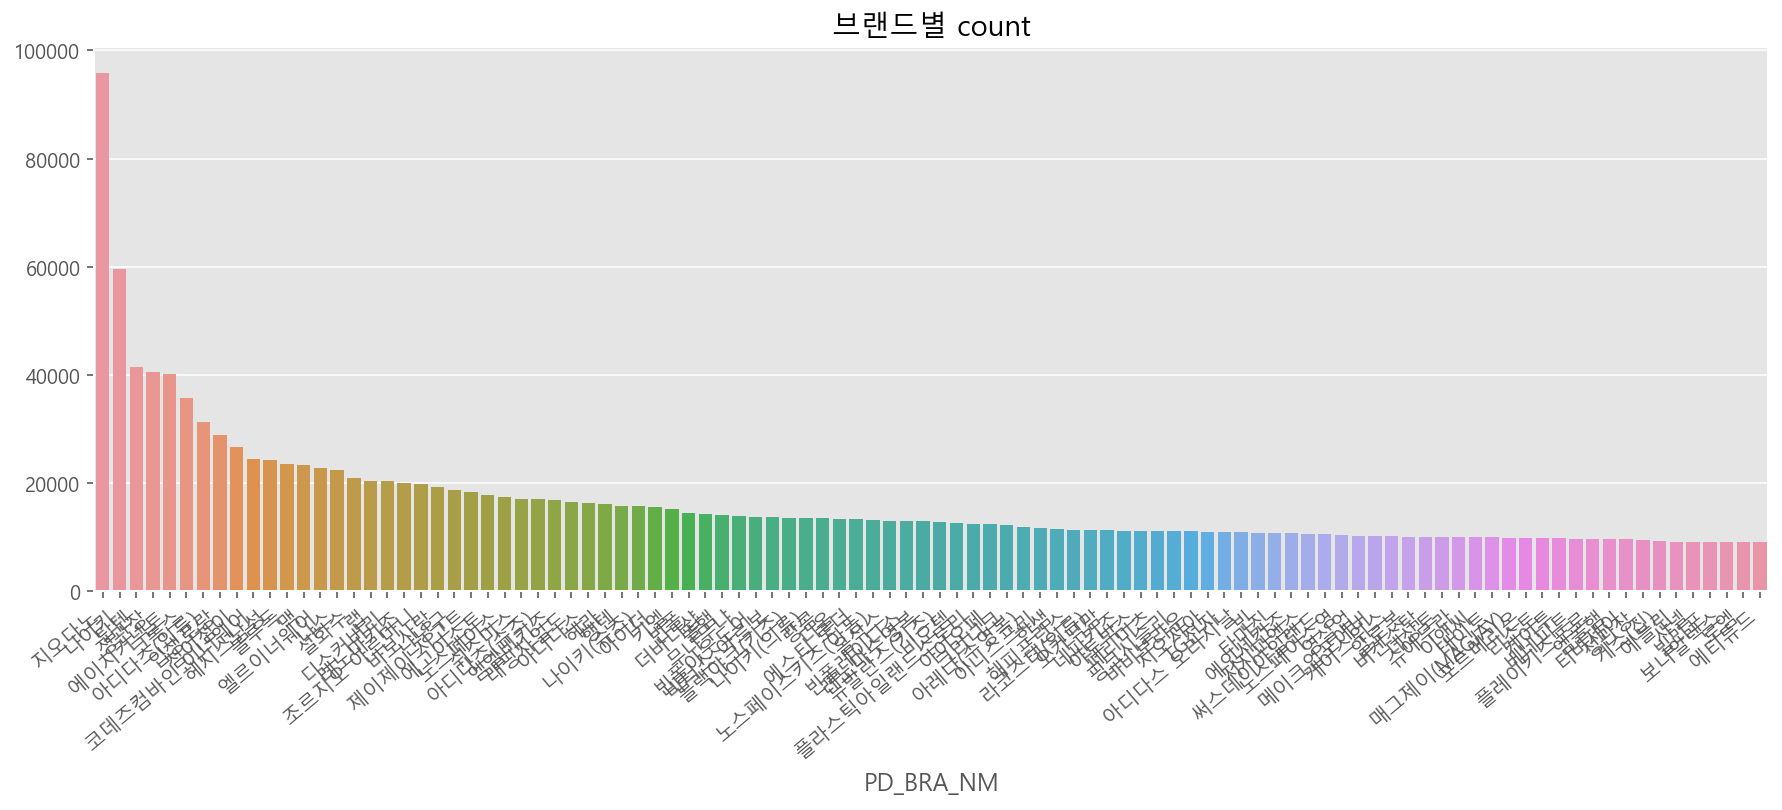

In [66]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100cnt_BRAND.index, y=np.ravel(TOP100cnt_BRAND.values,order='F'))
plt.title("브랜드별 count")

In [67]:
# 판매 금액이 가장 많은 브랜드
pd.options.display.float_format = '{:.2f}'.format
TOP100sell_BRAND=TOP100_BRAND['sum'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100sell_BRAND

,PD_BUY_TOTAL
PD_BRA_NM,
LG전자,10423858792.00
정관장,6707459950.00
삼성전자,4216742164.00
나이키,4103931370.00
프라다,3493394039.00
...,...
씨씨콜렉트,452410880.00
쿠론,452274000.00
에이치커넥트,451507770.00


Text(0.5, 1.0, '브랜드별 판매액')

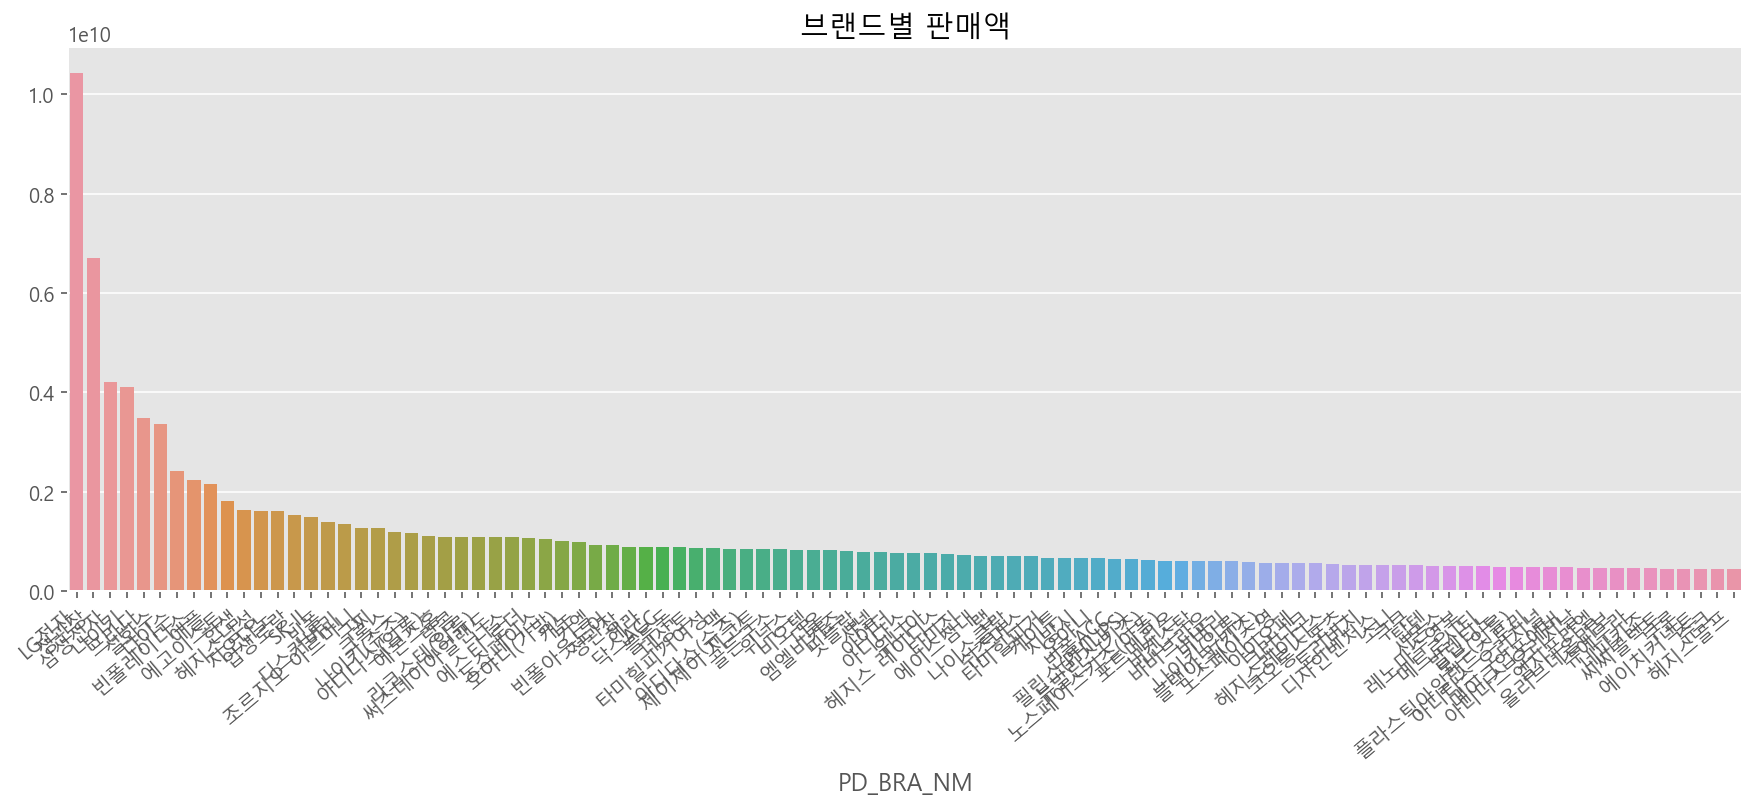

In [68]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100sell_BRAND.index, y=np.ravel(TOP100sell_BRAND.values,order='F'))
plt.title("브랜드별 판매액")

- category1 별 분포 (count)

In [69]:
pd.options.display.float_format = '{:.2f}'.format
TOP100_CAT1=product_master.pivot_table(index='CLAC1_NM',
                            values='PD_BUY_TOTAL',
                          aggfunc=['count','sum'])
TOP100_CAT1.head(10)

,count,sum
,PD_BUY_TOTAL,PD_BUY_TOTAL
CLAC1_NM,,
가구,43485,12399026355.00
건강식품,123623,10762419216.00
계절가전,13886,5237918916.00
과일,25105,791061560.00
구기/필드스포츠,33899,2498330087.00
남성의류,554910,18457045085.00
냉동식품,13586,304740110.00
냉장/세탁가전,7524,7409639092.00


In [70]:
# 판매 횟수가 가장 많은 CAT1
TOP100cnt_CAT1=TOP100_CAT1['count'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100cnt_CAT1.head(10)

,PD_BUY_TOTAL
CLAC1_NM,
여성의류,677199
화장품/뷰티케어,574033
스포츠패션,564355
남성의류,554910
패션잡화,449032
속옷/양말/홈웨어,417473
유아동의류,341572
시즌스포츠,150424
출산/육아용품,141512


Text(0.5, 1.0, 'cat1별 count')

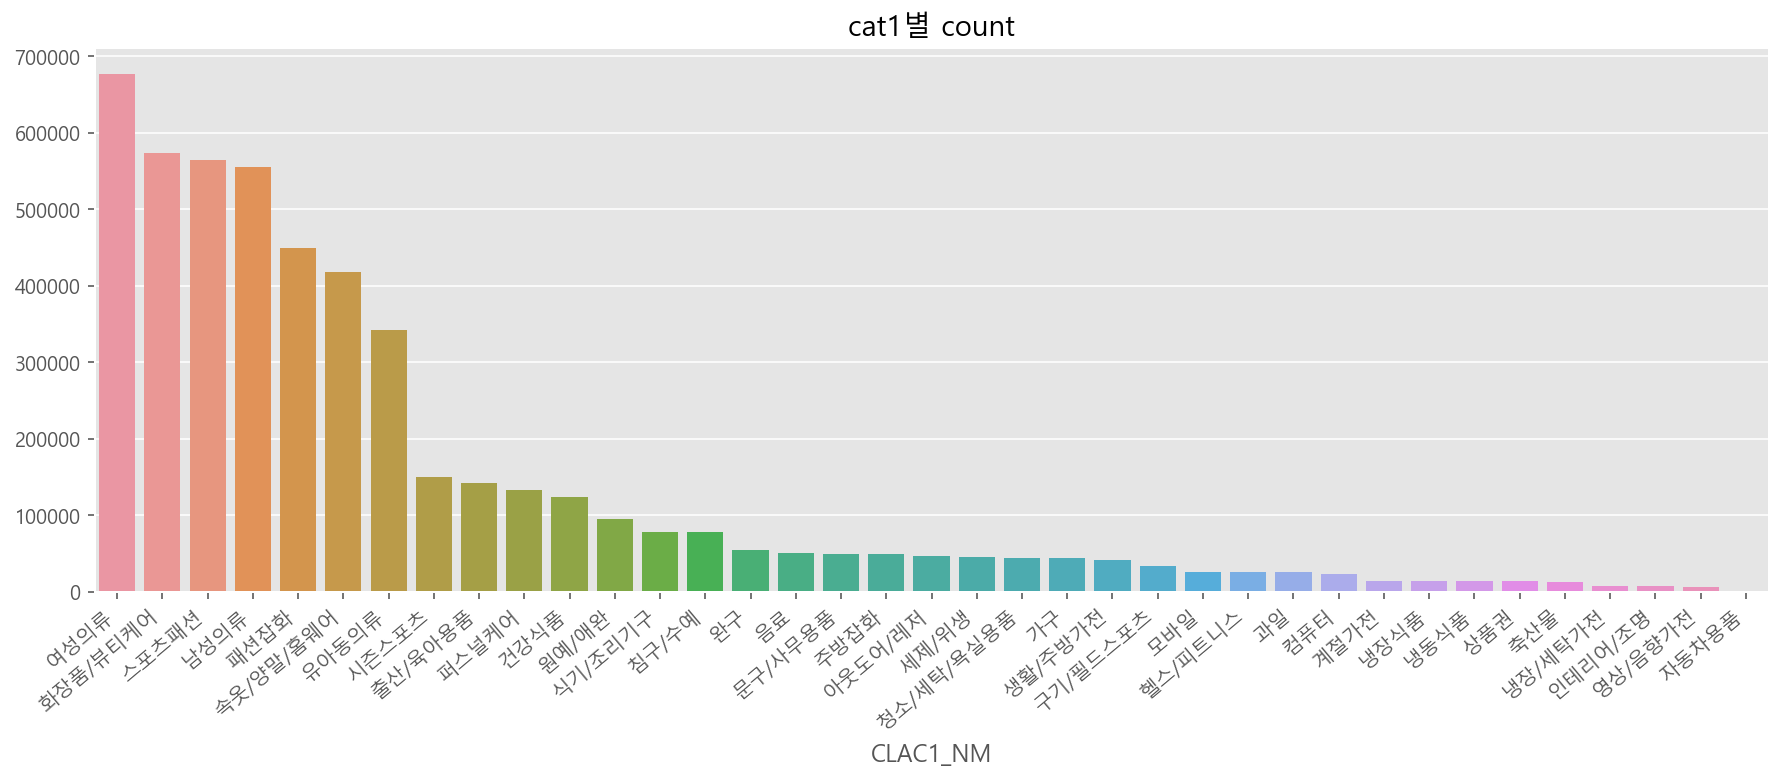

In [71]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100cnt_CAT1.index, y=np.ravel(TOP100cnt_CAT1.values,order='F'))
plt.title("cat1별 count")

In [72]:
# 판매 금액이 가장 많은 CAT1
pd.options.display.float_format = '{:.2f}'.format
TOP100sell_CAT1=TOP100_BRAND['sum'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100sell_CAT1

,PD_BUY_TOTAL
PD_BRA_NM,
LG전자,10423858792.00
정관장,6707459950.00
삼성전자,4216742164.00
나이키,4103931370.00
프라다,3493394039.00
...,...
씨씨콜렉트,452410880.00
쿠론,452274000.00
에이치커넥트,451507770.00


Text(0.5, 1.0, 'cat1별 판매금액')

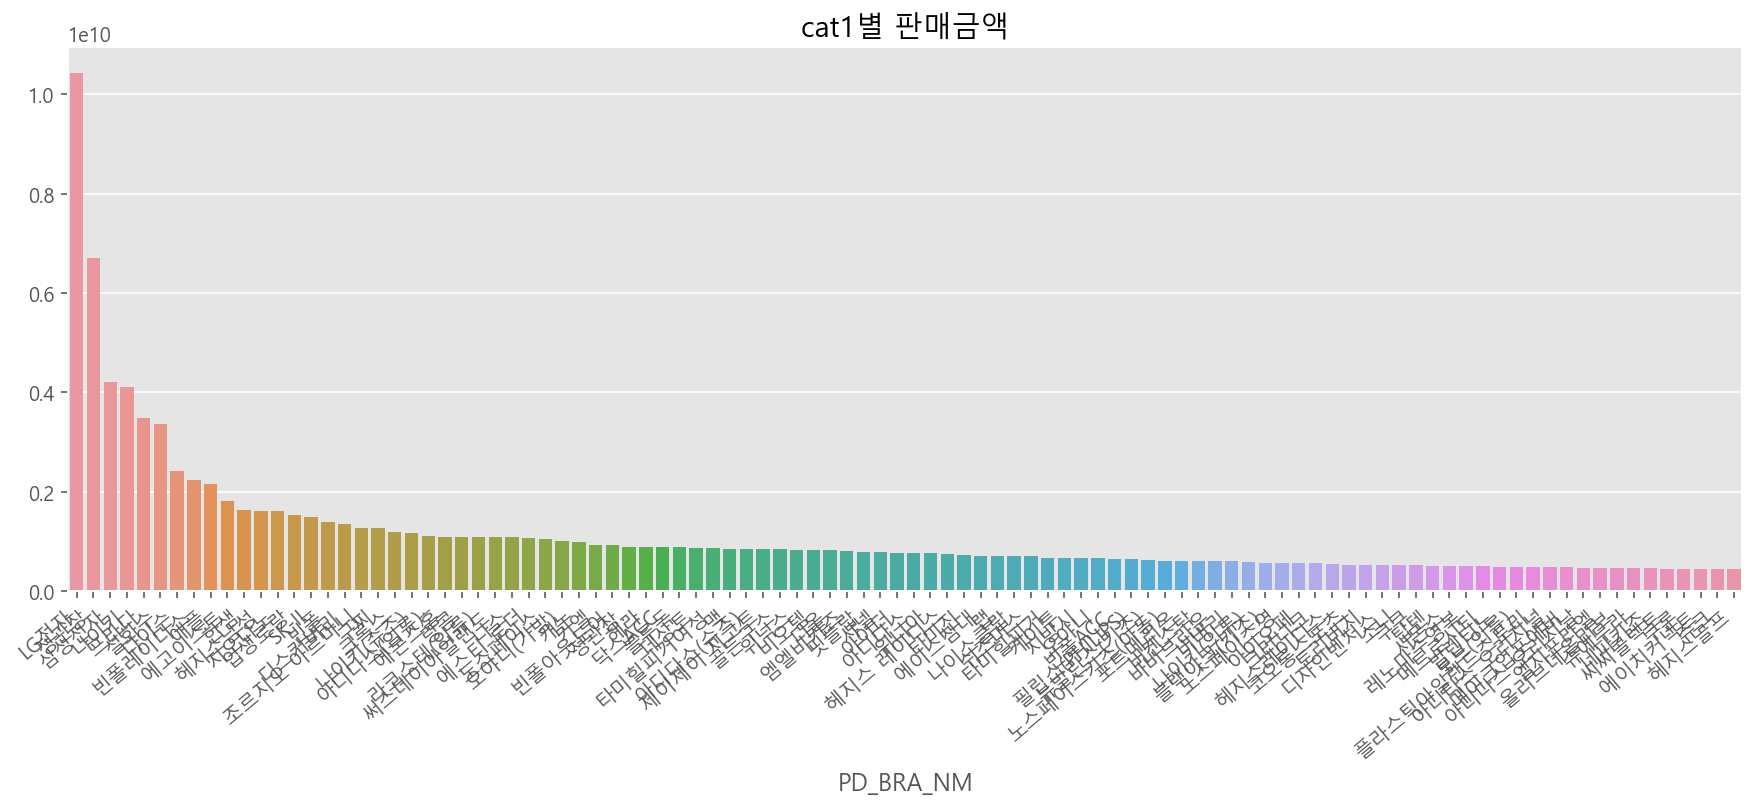

In [73]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100sell_CAT1.index, y=np.ravel(TOP100sell_CAT1.values,order='F'))
plt.title("cat1별 판매금액")

- category2 별 분포 (count)

In [ ]:
#위와 동일 일단 생략

# Ⅱ. search1

## Ⅱ-1.

In [74]:
# 검색한 상품이 어떤 상품군(cat)에 속하는지 파악해야할 필요가 있다
# 그래야 CLNT_ID 별 검색 후 구매 성공까지 연결 지을 수 있다.
# 그러기 위해서는 product에서 상품명을 추출 한 후 search1에 cat1,2,3 를 추가해주는게 가장 베스트 

In [75]:
search1  # 클라이언트 id별

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1
...,...,...,...,...
2884938,6391796,1822515,일자핏,1
2884939,6391796,1822515,화이트티셔츠,1
2884940,6391796,764020,양말,6
2884941,6391796,1822515,어항,2


In [76]:
search1.pivot_table(index = 'CLNT_ID',
                   values='SEARCH_CNT',
                   aggfunc='sum')

,SEARCH_CNT
CLNT_ID,
14,5
25,21
33,22
56,5
58,18
...,...
6592524,14
6592536,4
6592537,15


# Ⅲ. search2

In [77]:
search2  # 날짜별

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
0,2018-04-07,닥스원피스,8,2018,4,7
1,2018-04-07,닥터지 브라이트닝,1,2018,4,7
2,2018-04-07,달팡 인트랄,2,2018,4,7
3,2018-04-07,대상트,1,2018,4,7
4,2018-04-07,더블유닷,6,2018,4,7
...,...,...,...,...,...,...
8051167,2018-09-12,stl수영복,3,2018,9,12
8051168,2018-09-12,supreme,2,2018,9,12
8051169,2018-09-12,tsdjpi82010,17,2018,9,12
8051170,2018-09-12,zen정장,12,2018,9,12


- 월별 날짜별 시간별 검색량 추세 파악

In [78]:
search2[search2['KWD_NM']=='데상트']    # 데상트도 있고 대상트(오타)도 있고..

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
49593,2018-04-28,데상트,375,2018,4,28
117413,2018-04-22,데상트,571,2018,4,22
181267,2018-06-24,데상트,259,2018,6,24
190796,2018-04-01,데상트,469,2018,4,1
218356,2018-07-07,데상트,252,2018,7,7
...,...,...,...,...,...,...
7811828,2018-05-12,데상트,281,2018,5,12
7843092,2018-07-25,데상트,283,2018,7,25
7892543,2018-05-15,데상트,257,2018,5,15
7909172,2018-08-06,데상트,288,2018,8,6


In [79]:
search2[search2['KWD_NM']=='대상트']

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
3,2018-04-07,대상트,1,2018,4,7
15258,2018-07-22,대상트,1,2018,7,22
50374,2018-04-22,대상트,3,2018,4,22
62895,2018-04-21,대상트,4,2018,4,21
104961,2018-04-17,대상트,1,2018,4,17
...,...,...,...,...,...,...
7587984,2018-09-20,대상트,2,2018,9,20
7680406,2018-05-23,대상트,1,2018,5,23
7841234,2018-08-26,대상트,3,2018,8,26
7952596,2018-09-29,대상트,3,2018,9,29


# Ⅳ. custom

In [80]:
custom

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30
...,...,...,...
671674,3725302,F,40
671675,3725462,M,40
671676,3725818,F,30
671677,3661812,F,30


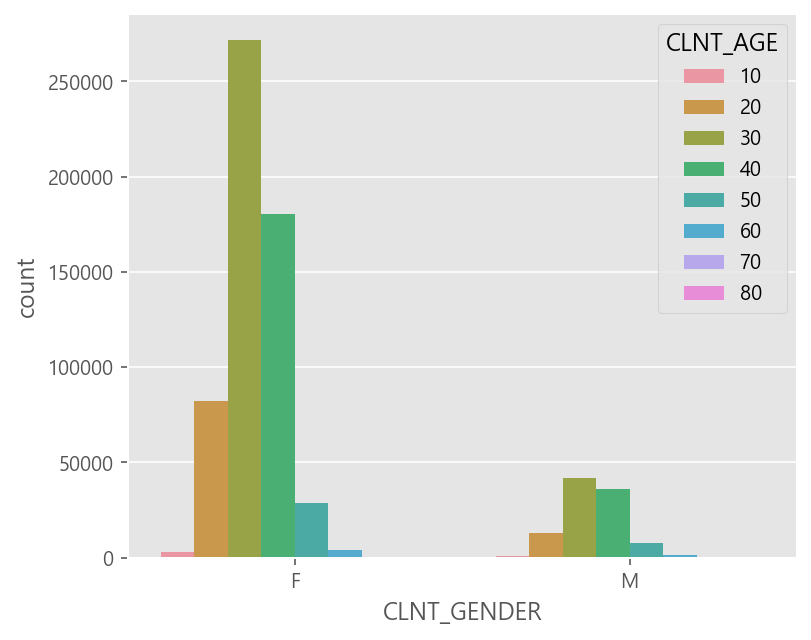

In [81]:
plt.figure(figsize=[6,5])

sns.countplot(data=custom,x='CLNT_GENDER',hue='CLNT_AGE')

# Ⅴ. session

In [82]:
session

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,year,month,day
0,5873599,8641867,9,2018-05-09,82.00,"1,890",mobile,Daejeon,Daejeon,2018,5,9
1,5873599,6616320,21,2018-06-11,105.00,"1,604",mobile,Busan,Busan,2018,6,11
2,5873599,5886172,40,2018-06-24,41.00,632,mobile,Daejeon,Daejeon,2018,6,24
3,5873884,1050889,15,2018-09-13,160.00,"1,035",mobile,Gyeonggi-do,Anyang,2018,9,13
4,5874461,10298270,5,2018-04-12,13.00,298,mobile,Seoul,Seoul,2018,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2712902,3500464,8713975,308,2018-05-08,71.00,423,mobile,Seoul,Seoul,2018,5,8
2712903,3501155,4636571,86,2018-07-14,44.00,"2,090",desktop,Seoul,Seoul,2018,7,14
2712904,3501397,582632,128,2018-09-20,164.00,"2,435",mobile,Seoul,Seoul,2018,9,20
2712905,3573271,2328407,9,2018-08-22,5.00,986,desktop,Busan,Busan,2018,8,22


- 컴마 지워주고 인트형으로 바꾸기

In [83]:
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].astype('str')
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].apply(delcom)

- 지도그리기

In [84]:
import geopandas as gpd
import os
# conda install geopandas
# conda install descartes

In [85]:
where=['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
      '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [86]:
map_data=pd.DataFrame()

In [87]:
for i in range(len(where)):
    map_dir='D:/08_BA_project/lpoint/5th_lpoint_data/korea_location/'+where[i]

    file_name=os.listdir(map_dir)[1]
    
    dir_filename=map_dir+'/'+file_name
    
    data = gpd.read_file(dir_filename, encoding='euckr')
    map_data=pd.concat([map_data,data],axis=0)

In [88]:
map_data.geometry = map_data.buffer(0.001)

In [89]:
map_data = map_data.dissolve(by='SIG_CD')

In [90]:
to_eng=session['ZON_NM'].unique()

In [91]:
map_do=map_data['CTP_KOR_NM'].unique()
map_do=np.delete(map_do,7)

In [92]:
to_kor=['대전광역시','부산광역시','경기도','서울특별시','경상북도','전라북도','충청북도','강원도',
        '충청남도','인천광역시','대구광역시','광주광역시','경상남도','제주특별자치도','전라남도','울산광역시']

In [93]:
dic=dict(zip(to_eng,to_kor))

In [94]:
do_cnt=session.pivot_table(index='ZON_NM',
                    values='CITY_NM',
                   aggfunc='count').reset_index()
do_cnt['KOR_DO']=do_cnt.replace({"ZON_NM":dic})['ZON_NM']
do_cnt=do_cnt.rename(columns={'CITY_NM':'CNT'})
do_cnt=do_cnt.sort_values('CNT')       
do_cnt['colornum']=['1.>0','2.>3','2.>3','2.>3','2.>3','3.>5','4.>7','4.>7','4.>7','5.>9','6.>10','6.>10','6.>10','7.>20','8.>40','9.>100']

In [95]:
dic2=dict(zip(do_cnt["KOR_DO"],do_cnt["colornum"]))
dic2['세종특별자치시'] = '2.>3'


In [96]:
map_data['COLOR_NUM']=map_data.replace({"CTP_KOR_NM":dic2})['CTP_KOR_NM']
map_data['COLOR_NUM']=map_data['COLOR_NUM'].astype('str')

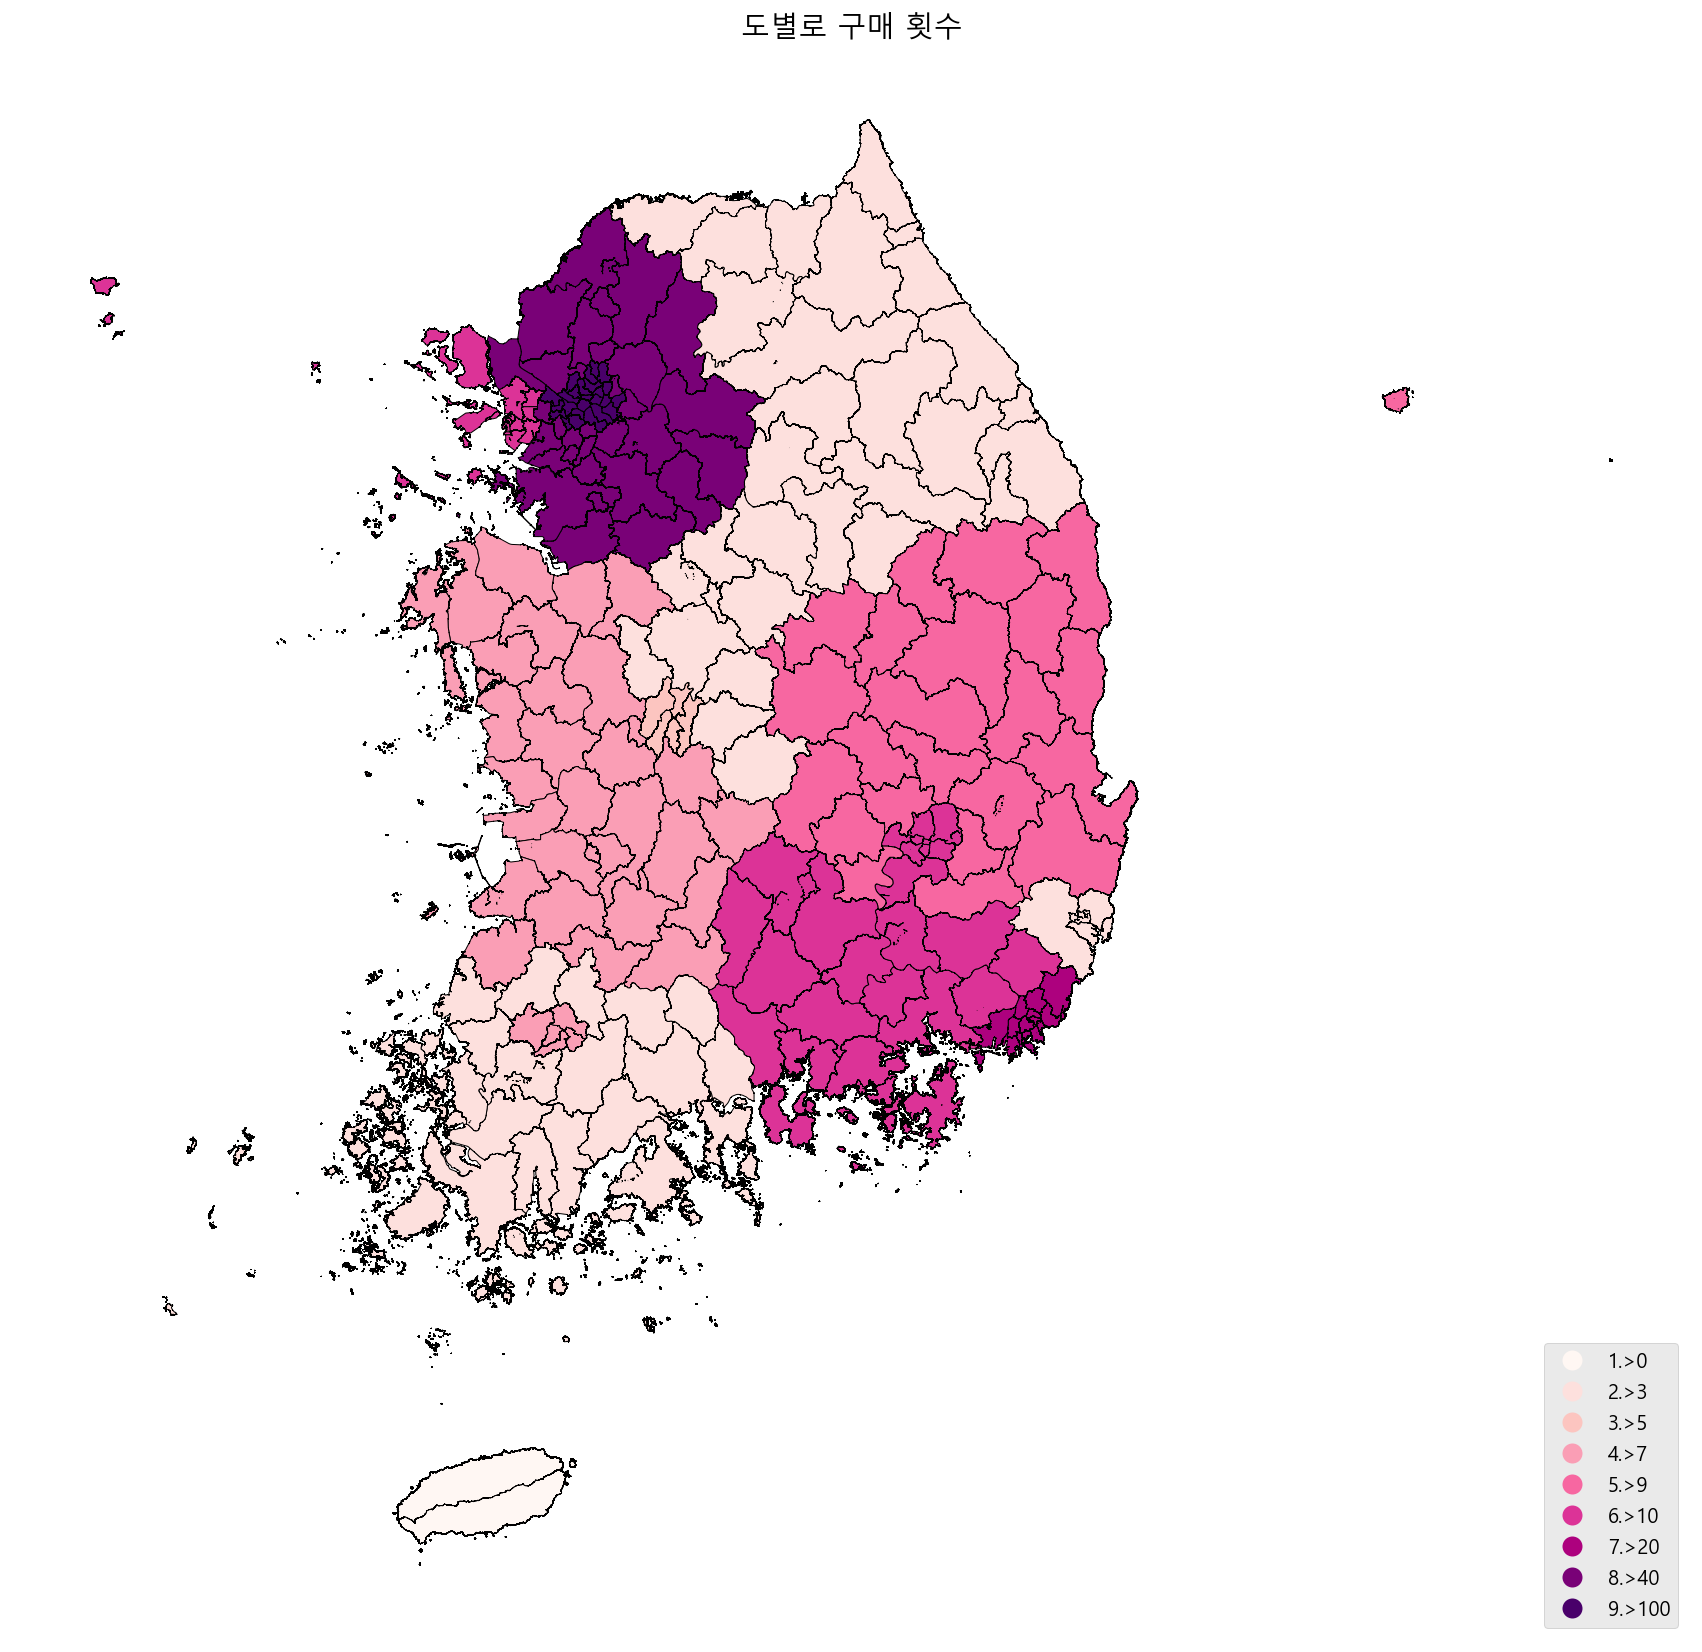

In [97]:
ax = map_data.plot(figsize=(15, 15), column="COLOR_NUM", categorical=True,
                cmap="RdPu", edgecolor="k", legend=True, legend_kwds={'loc': 4},
                  label=dic2.keys())

ax.set_title("도별로 구매 횟수")
ax.set_axis_off()
plt.show()

# Ⅵ. master

In [98]:
master

,PD_C,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,64382,언더아머 남성 UA HG 아머 모크 LS 1289559-001 - 블랙 / MD[95],스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
1,62282,여자 플라워덧신 2족선물세트 17403-2set,속옷/양말/홈웨어,여성양말류,여성일반양말
2,61729,88A2933253배트맨스웨트티 - 블랙 / 130,유아동의류,유아의류상의,영유아티셔츠/탑
3,61537,"닥터마틴 아드리안 블랙, 체리레드 - 02_체리레드 / 250mm(6)",패션잡화,남성화,남성부츠
4,58820,여성 그레이 스트라이프 퍼프 소매 블라우스 (128865YQ33) - 회색(앤틱실버...,남성의류,남성의류상의,남성남방셔츠
...,...,...,...,...,...
847647,400721,[피핀] 클레르 박스 롱티셔츠 103764 - ivory / FREE ◈85564075◈,여성의류,여성의류상의,여성티셔츠/탑
847648,400382,[바니플랫]여성플랫/BNF63011EN - 브라운 / 245 ◈83660832◈,패션잡화,여성화,여성플랫
847649,400197,섀르반 올인원 수영복 (K14D5DM231) - BL/110,시즌스포츠,수영/물놀이,아동수영복
847650,399225,링클플리츠주름밴딩스커트(CFHM1SK8821) - 블랙 / FREE,여성의류,여성의류하의,여성스커트


In [99]:
len(master['CLAC1_NM'].unique())

37

# 병합

In [100]:
#p roduct + session
prod_sess=pd.merge(product,session,on=['CLNT_ID','SESS_ID'])

In [101]:
# product + session + master
psm=pd.merge(prod_sess,master,on='PD_C')
del prod_sess

In [102]:
# 37개
cat=psm['CLAC1_NM'].unique()
print(len(cat))
cat

37


array(['화장품/뷰티케어', '스포츠패션', '퍼스널케어', '유아동의류', '패션잡화', '아웃도어/레저', '시즌스포츠',
       '여성의류', '남성의류', '생활/주방가전', '침구/수예', '출산/육아용품', '식기/조리기구', '모바일',
       '완구', '속옷/양말/홈웨어', '건강식품', '과일', '음료', '청소/세탁/욕실용품', '문구/사무용품',
       '주방잡화', '상품권', '원예/애완', '인테리어/조명', '냉동식품', '구기/필드스포츠', '세제/위생',
       '영상/음향가전', '계절가전', '냉장/세탁가전', '가구', '냉장식품', '컴퓨터', '헬스/피트니스',
       '축산물', '자동차용품'], dtype=object)

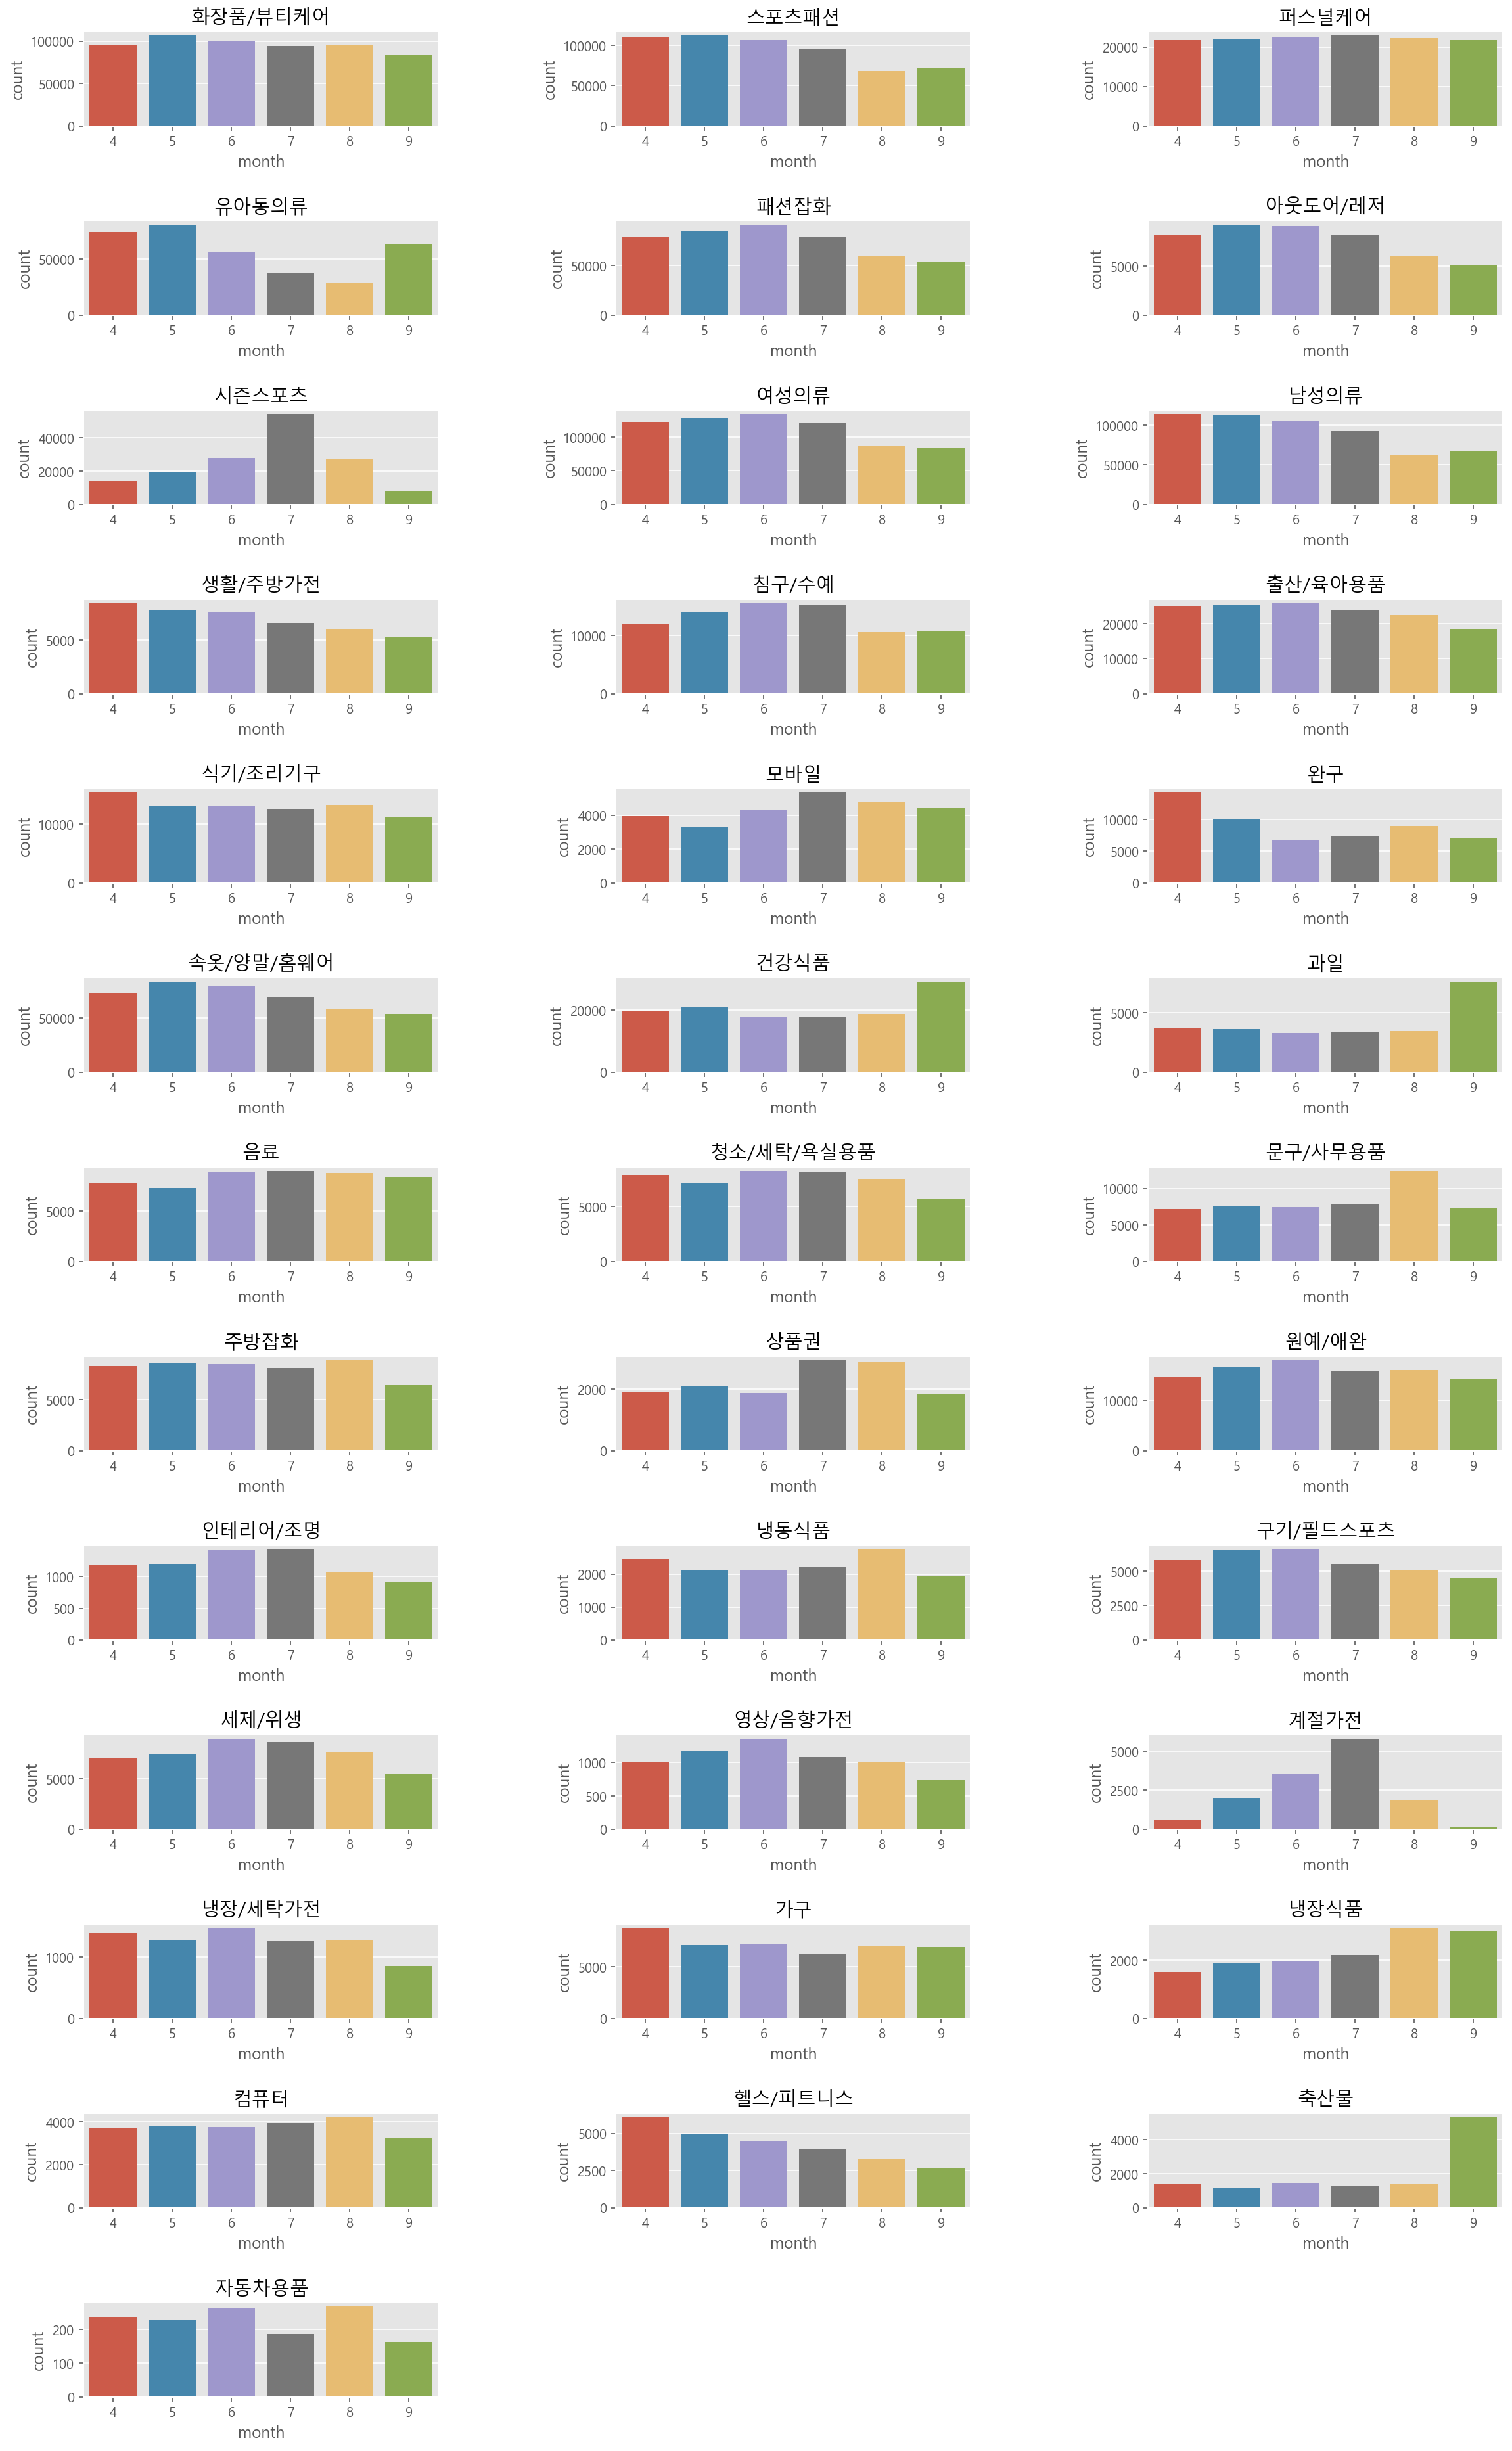

In [103]:
# 월별 cat1 별 판매 횟수
plt.figure(figsize=[15,25])
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 1, wspace = 0.5)
cols = 3
rows = 13 

for i in range(1,38):
    #
    plt.subplot(rows, cols, i)
    plt.title(cat[i-1])  
    df_cat=psm[psm['CLAC1_NM']==cat[i-1]]
    sns.countplot(data=df_cat,x='month')

plt.show()
